## Installation

In [ ]:
# !pip install matplotlib pandas nltk textblob

## Tools

### NLTK: Natural Language Tooklit

[Natural Language Toolkit](https://www.nltk.org/) is an older platform for text analysis i python, however it suffers from being more simplified, and lacks several complex features necessary for sentiment analysis. We will use several datasets to explore how effective this toolkit is in sentiment analysis.


In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

VADER is the primary tool built into the NLTK that is used in sentiment analysis. Here is a sample usage of the tool on a statement.


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
sia.polarity_scores("This restaurant was great, but I'm not sure if I'll go there again.")

{'neg': 0.153, 'neu': 0.688, 'pos': 0.159, 'compound': 0.0276}

- **negative:** the negative sentiment in a sentence
- **neutral:** the neutral sentiment in a sentence
- **positive:** the postivie sentiment in the sentence
- **compound:** the aggregated sentiment.
    


In [ ]:
text = "I just got a call from my boss - does he realise it's Saturday?"
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### TextBlob

TextBlob is an additional tool built on NTLK that is used widely in sentiment analysis for its ease of use. While it is generally pretty slow, its simple implementation makes it worth exploring

In [ ]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
blob = TextBlob("This restaurant was great, but I'm not sure if I'll go there again.")
blob.sentiment

Sentiment(polarity=0.275, subjectivity=0.8194444444444444)

Unlike the previous VADER example, TextBlob simply outputs the polarity of a statement as well as its subjectivity, or a measure of how factual the statement is. This may be of particular interest in a news media application where a measure of subjectivity may be an indicator of the polarity bias in a selected piece of text.

In [ ]:
blobber = Blobber(analyzer=NaiveBayesAnalyzer())

blob = blobber("This restaurant was great, but I'm not sure if I'll go there again.")
blob.sentiment

Sentiment(classification='pos', p_pos=0.5879425317005774, p_neg=0.41205746829942275)

## How were they made?
This portion of the notebook has been kept from: https://investigate.ai/investigating-sentiment-analysis/comparing-sentiment-analysis-tools/

The most important thing to understand is **sentiment is always just an opinion.** In this case it's an opinion, yes, but specifically **the opinion of a machine.**

### VADER

NLTK's Sentiment Intensity Analyzer works is using something called **VADER**, which is a list of words that have a sentiment associated with each of them.

|Word|Sentiment rating|
|---|---|
|tragedy|-3.4|
|rejoiced|2.0|
|disaster|-3.1|
|great|3.1|

If you have more positives, the sentence is more positive. If you have more negatives, it's more negative. It can also take into account things like capitalization - you can read more about the classifier [here](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html), or the actual paper it came out of [here](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf).

**How do they know what's positive/negative?** They came up with a very big list of words, then asked people on the internet and paid them one cent for each word they scored.

### TextBlob's `.sentiment`

TextBlob's sentiment analysis is based on a separate library called [pattern](https://www.clips.uantwerpen.be/pattern).

> The sentiment analysis lexicon bundled in Pattern focuses on adjectives. It contains adjectives that occur frequently in customer reviews, hand-tagged with values for polarity and subjectivity.

Same kind of thing as NLTK's VADER, but it specifically looks at words from customer reviews.

**How do they know what's positive/negative?** They look at (mostly) adjectives that occur in customer reviews and hand-tag them.

### TextBlob's `.sentiment` + NaiveBayesAnalyzer

TextBlob's other option uses a `NaiveBayesAnalyzer`, which is a machine learning technique. When you use this option with TextBlob, the sentiment is coming from "an NLTK classifier trained on a movie reviews corpus."

**How do they know what's positive/negative?** Looked at movie reviews and scores using machine learning, the computer _automatically learned_ what words are associated with a positive or negative rating.

## What's this mean for me?

When you're doing sentiment analysis with tools like this, you should have a few major questions:

* Where kind of dataset does the list of known words come from?
* Do they use all the words, or a selection of the words?
* Where do the positive/negative scores come from?

Let's compare the tools we've used so far.

|technique|word source|word selection|scores|
|---|---|---|---|
|NLTK (VADER)|everywhere|hand-picked|internet people, word-by-word|
|TextBlob|product reviews|hand-picked, mostly adjectives|internet people, word-by-word|
|TextBlob + NaiveBayesAnalyzer|movie reviews|all words|automatic based on score|

A major thing that should jump out at you is **how different the sources are.**

While VADER focuses on content found everywhere, TextBlob's two options are specific to certain domains. The [original paper for VADER](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf) passive-aggressively noted that VADER is effective at general use, but being trained on a specific domain can have benefits:

> While some algorithms performed decently on test data from the specific domain for which it was expressly trained, they do not significantly outstrip the simple model we use.

They're basically saying, "if you train a model on words from a certain field, it will be good at sentiment in that certain field."

### Comparison chart

Using the different tools explored above, we will try to understand the differences in their analysis of a selected portion of text extracted from news media relating to opioid abuse or misuse in Nashville. 5 pieces of texts have been selected and manually assigned their general sentiment. Two pieces are positive, one is neutral or objective, and two others are negative in their sentiment.

While the above portions have been reflected by the source material, the remaning portion of the notebook address their specific use in opiod abuse news media.

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

df = pd.DataFrame({'content': [
    "Seven hundred and fifty four people died by drug overdose in the Nashville area last year",
    "As part of the program, emergency room patients will get their first doses of buprenorphine, a drug that is Food and Drug Administration-approved to treat opioid use disorder, in the ER at no cost to them.",
    "Davidson County has the second-highest rate in the country, behind Baltimore, for overdose deaths in metros over 500,0000 people, according to 2022 data compiled by the San Francisco Chronicle.",
    "“It's really being able to treat people at the right time when they're ready, no matter what environment they're showing up in",
    "As an integral part of the program, Nashville General Hospital acknowledges the thoughtful design of the grant",
], 'labels': ["negative", "negative", "neutral", "positive", "positive"]})
df

,content,labels
0,Seven hundred and fifty four people died by drug overdose in the Nashville area last year,negative
1,"As part of the program, emergency room patients will get their first doses of buprenorphine, a drug that is Food and Drug Administration-approved to treat opioid use disorder, in the ER at no cost...",negative
2,"Davidson County has the second-highest rate in the country, behind Baltimore, for overdose deaths in metros over 500,0000 people, according to 2022 data compiled by the San Francisco Chronicle.",neutral
3,"“It's really being able to treat people at the right time when they're ready, no matter what environment they're showing up in",positive
4,"As an integral part of the program, Nashville General Hospital acknowledges the thoughtful design of the grant",positive


In [ ]:
def get_scores(content):
    blob = TextBlob(content)
    nb_blob = blobber(content)
    sia_scores = sia.polarity_scores(content)

    return pd.Series({
        'labels': content,
        'textblob': blob.sentiment.polarity,
        'textblob_bayes': nb_blob.sentiment.p_pos - nb_blob.sentiment.p_neg,
        'nltk': sia_scores['compound'],
    })

scores = df.content.apply(get_scores)
scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

,labels,textblob,textblob_bayes,nltk
0,Emergency departments see patients who are dealing with opioid use disorder on a daily basis.,0.000000,0.807394,-0.648600
1,The Tennessee Department of Mental Health and Substance Abuse Services and the Tennessee Hospital Association have partnered to bring medication-assisted treatment to emergency rooms statewide.,-0.100000,0.810036,-0.778300
2,"Nashville General Hospital has joined the second cohort of the program, with plans to implement medication-assisted treatment in early 2024.",0.050000,0.540825,0.000000
3,"The city’s safety-net hospital will receive $250,000 to spend on buprenorphine, naloxone, transportation for patients and incentives for doctors to get involved in the program.",0.000000,-0.209023,0.318200
4,"Dr. Deann Bullock, emergency department medical director at Nashville General Hospital, tells Scene sister publication the Nashville Post that the hospital sees multiple patients with opioid use disorder each day.",0.016667,0.996638,-0.648600
5,"Some patients come to the department with withdrawal symptoms, some are actively under the influence, and some come for other health problems.",-0.129167,0.688413,-0.077200
6,She says emergency room providers refer patients to addiction services when they can.,0.000000,-0.008593,-0.381800
7,"“The few places that we can refer to at times may not have availability, it may be the weekend, it may be the night,” Bullock says.",-0.200000,0.807445,0.000000
8,"“There's no consistency in it, and it is not something that's required of our providers, nor is it something that is universally implemented across the board.” As part of the program, emergency room patients will get their first doses of buprenorphine, a drug that is Food and Drug Administration-approved to treat opioid use disorder, in the ER at no cost to them.",0.125000,-0.076117,-0.718400
9,Then they will be referred to area resources to continue recovery.,0.000000,0.686736,0.000000


## Review

**Sentiment analysis** is judging whether a piece of text has positive or negative emotion. We covered several tools for doing automatic sentiment analysis: **NLTK**, and two techniques inside of **TextBlob**.

Each tool uses a different data to determine what is positive and negative, and while some use **humans** to flag things as positive or negative, others use a automatic **machine learning**.

As a result of these differences, each tool can come up with very **different sentiment scores** for the same piece of text.

In [ ]:
# prompt: given a paragraph, split it into sentences in a list

import nltk
nltk.download('punkt')
def split_into_sentences(paragraph):
  sentences = nltk.sent_tokenize(paragraph)
  return sentences


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
paragraph = "Emergency departments see patients who are dealing with opioid use disorder on a daily basis. The Tennessee Department of Mental Health and Substance Abuse Services and the Tennessee Hospital Association have partnered to bring medication-assisted treatment to emergency rooms statewide. Nashville General Hospital has joined the second cohort of the program, with plans to implement medication-assisted treatment in early 2024. The city’s safety-net hospital will receive $250,000 to spend on buprenorphine, naloxone, transportation for patients and incentives for doctors to get involved in the program. Dr. Deann Bullock, emergency department medical director at Nashville General Hospital, tells Scene sister publication the Nashville Post that the hospital sees multiple patients with opioid use disorder each day. Some patients come to the department with withdrawal symptoms, some are actively under the influence, and some come for other health problems. She says emergency room providers refer patients to addiction services when they can. “The few places that we can refer to at times may not have availability, it may be the weekend, it may be the night,” Bullock says. “There's no consistency in it, and it is not something that's required of our providers, nor is it something that is universally implemented across the board.” As part of the program, emergency room patients will get their first doses of buprenorphine, a drug that is Food and Drug Administration-approved to treat opioid use disorder, in the ER at no cost to them. Then they will be referred to area resources to continue recovery. In the three-year program, the amount distributed decreases gradually each year, with the hope that the hospital can sustain the program in the fourth year and beyond. Bullock says Nashville General’s goal is to establish a structure for physician training, referral and treatment, but its success is still limited by available area services. “I think any time you're dealing with some of this population, resources are limited,” she says. “This is providing an opportunity for us to develop what works for us, what works for our community, what works for our patients.” In the first contract period, three hospitals (Jackson-Madison County General Hospital, Ascension Saint Thomas Rutherford and UT Knoxville Medical Center) administered buprenorphine to 306 patients, 533 patients left the emergency department with naloxone in hand, and 1,755 were referred to recovery navigators. The medication-assisted treatment program builds off the Tennessee Recovery Navigators initiative, a peer recovery program that TDMHSAS introduced in 2018. Navigators with lived experience help connect patients to available resources and follow up with them in the days and months following an incident. Jessica Youngblom, director of strategic initiatives at TDMHSAS, says that in the first cohort she saw strengthened coordination between hospitals and area addiction service providers, and the program helped decrease stigma for those with opioid use disorder and for the use of medication-assisted treatment throughout the emergency department. “[Participating physicians] said it actually revitalized them to have something they can actually do with patients coming in with opioid use disorder,” Youngblom says. “A lot of times an individual is handed a resource sheet. Most of the time it's outdated. They don't really feel like they're helping, and they felt like this was actually giving them a tool to help individuals who need the service.” Youngblom says she has fielded concerns that emergency rooms will become nothing more than a medication-assisted treatment clinic. In 2024, hospitals involved in the project will begin tracking whether individuals they serve come back within seven days. “This program is so much more than just providing a medication,” she says. “It's really being able to treat people at the right time when they're ready, no matter what environment they're showing up in, and then making sure that they're getting connected to this community-based treatment so that they continue their recovery journey. I think something about this project that I want people to hear loud and clear is that it's not just giving medication. It's so much more than that.” An initial goal for the project was to increase the number of physicians who had completed a federally required training called the X waiver to administer buprenorphine (eight hours of training for doctors and 24 hours for other medical professionals). In December 2022, President Biden signed the Consolidated Appropriations Act, which eliminated additional federal requirements for physicians to prescribe buprenorphine. Physicians are also no longer limited in the number of patients they can provide medication-assisted treatment. Nashville General is still evaluating what training it will require to get physicians comfortable with administering buprenorphine, Bullock said. Medication-assisted treatment is also set to be part of the 15-month pilot program chosen by the Nashville-Davidson County steering committee tasked with spending $23 million in opioid abatement funds. At the latest Metro Behavioral Health and Wellness Advisory Council meeting, committee members said the request for proposal for that pilot program is expected to be released in late January or early February."

In [ ]:
tokenized_paragraph = split_into_sentences(paragraph)

In [ ]:
print(tokenized_paragraph)

['Emergency departments see patients who are dealing with opioid use disorder on a daily basis.', 'The Tennessee Department of Mental Health and Substance Abuse Services and the Tennessee Hospital Association have partnered to bring medication-assisted treatment to emergency rooms statewide.', 'Nashville General Hospital has joined the second cohort of the program, with plans to implement medication-assisted treatment in early 2024.', 'The city’s safety-net hospital will receive $250,000 to spend on buprenorphine, naloxone, transportation for patients and incentives for doctors to get involved in the program.', 'Dr. Deann Bullock, emergency department medical director at Nashville General Hospital, tells Scene sister publication the Nashville Post that the hospital sees multiple patients with opioid use disorder each day.', 'Some patients come to the department with withdrawal symptoms, some are actively under the influence, and some come for other health problems.', 'She says emergenc

In [ ]:
df = pd.DataFrame({'content': tokenized_paragraph})
df

,content
0,Emergency departments see patients who are dealing with opioid use disorder on a daily basis.
1,The Tennessee Department of Mental Health and Substance Abuse Services and the Tennessee Hospital Association have partnered to bring medication-assisted treatment to emergency rooms statewide.
2,"Nashville General Hospital has joined the second cohort of the program, with plans to implement medication-assisted treatment in early 2024."
3,"The city’s safety-net hospital will receive $250,000 to spend on buprenorphine, naloxone, transportation for patients and incentives for doctors to get involved in the program."
4,"Dr. Deann Bullock, emergency department medical director at Nashville General Hospital, tells Scene sister publication the Nashville Post that the hospital sees multiple patients with opioid use d..."
5,"Some patients come to the department with withdrawal symptoms, some are actively under the influence, and some come for other health problems."
6,She says emergency room providers refer patients to addiction services when they can.
7,"“The few places that we can refer to at times may not have availability, it may be the weekend, it may be the night,” Bullock says."
8,"“There's no consistency in it, and it is not something that's required of our providers, nor is it something that is universally implemented across the board.” As part of the program, emergency ro..."
9,Then they will be referred to area resources to continue recovery.


In [ ]:
def get_scores(content):
    sia_scores = sia.polarity_scores(content)

    return pd.Series({
        'nltk': sia_scores['compound'],
    })

scores = df.content.apply(get_scores)
scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

,nltk
0,-0.648600
1,-0.778300
2,0.000000
3,0.318200
4,-0.648600
5,-0.077200
6,-0.381800
7,0.000000
8,-0.718400
9,0.000000


In [ ]:
positive_score = 0
neutral_score = 0
negative_score = 0

for score in scores.nltk:
  if score > 0:
    positive_score = positive_score + 1
  elif score < 0:
    negative_score = negative_score + 1
  else:
    neutral_score = neutral_score + 1

print(positive_score)
print(neutral_score)
print(negative_score)

11
12
8


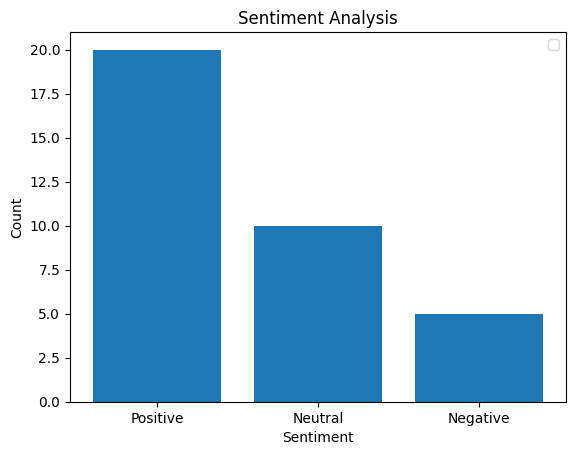

In [ ]:
# prompt: make one horizontal stacked bar chart split into three sections given the amount of each section

import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataset
data = {'Positive': positive_score, 'Neutral': neutral_score, 'Negative': negative_score}

# Create a stacked bar chart
plt.bar(data.keys(), data.values())

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# Add a legend
plt.legend()

# Show the plot
plt.show()


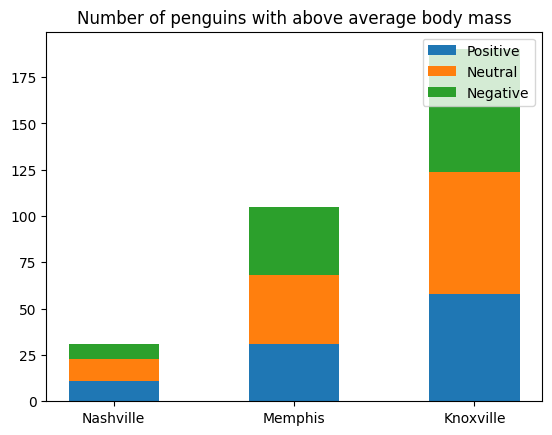

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
species = (
    "Nashville",
    "Memphis",
    "Knoxville",
)
weight_counts = {
    "Positive": np.array([11, 31, 58]),
    "Neutral": np.array([12, 37, 66]),
    "Negative": np.array([8, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")


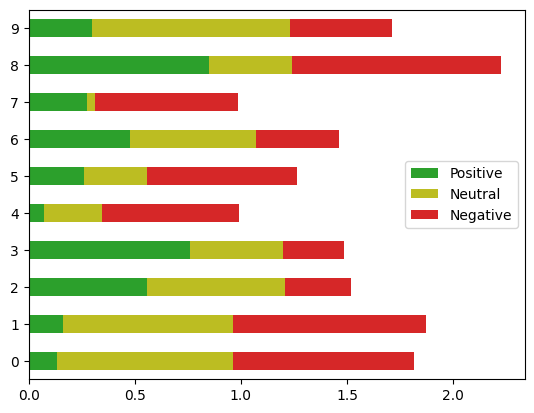

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 3), columns=["Positive", "Neutral", "Negative"])
df2.plot.barh(stacked=True, color=['tab:green','tab:olive','tab:red']);

Note that the source material and sentiment analysis guidance has been used from https://investigate.ai/investigating-sentiment-analysis/comparing-sentiment-analysis-tools/